# Convolutional Neural Networks in 15 minutes or less

This is the neural network model (VGG) that we will be using!

<img src="tutorial_img/conv/vgg.png" width="423">



### Why do we need all of this?
Turns out regular Neural Nets don’t scale well to full images. Even images that are only of size 32x32x3 (32 wide, 32 high, 3 color channels), a single fully-connected neuron in a first hidden layer of a regular Neural Network would have $32*32*$3 = 3072 weights. 

This amount still seems manageable, but clearly this fully-connected structure does not scale to larger images. For example, an image of more respectable size, e.g. $200 * 200 * 3$, would lead to neurons that have $200*200*3 = 120,000$ weights. Moreover, we would almost certainly want to have several such neurons, so the parameters would add up quickly! Clearly, this full connectivity is wasteful.

### Convolutional Neural Networks

Convolutional Neural Networks take advantage of the fact that the input consists of images and they constrain the architecture in a more sensible way. In particular, unlike a regular Neural Network, the layers of a ConvNet have neurons arranged in 3 dimensions: width, height, depth. (Note that the word depth here refers to the third dimension of an activation volume, not to the depth of a full Neural Network, which can refer to the total number of layers in a network.)

<img src="tutorial_img/conv/cnn.jpg" width="423">

As we will soon see, the neurons in a layer will only be connected to a small region of the layer before it, instead of all of the neurons in a fully-connected manner. 

By the end of the ConvNet architecture we will reduce the full image into a single vector of class scores, arranged along the depth dimension (ie, something like dimensions 1x1x10).

### What is ReLU? What is Softmax? What is pooling?

We use three main types of layers to build ConvNet architectures: Convolutional Layer, Pooling Layer, and Fully-Connected Layer (exactly as seen in regular Neural Networks). We will stack these layers to form a full ConvNet architecture.

 In more detail:

* INPUT [32x32x3] will hold the raw pixel values of the image, in this case an image of width 32, height 32, and with three color channels R,G,B.
* CONV layer will compute the output of neurons that are connected to local regions in the input, each computing a dot product between their weights and a small region they are connected to in the input volume. This may result in volume such as [32x32x12] if we decided to use 12 filters.
* RELU layer will apply an elementwise activation function, such as the max(0,x)max(0,x) thresholding at zero. This leaves the size of the volume unchanged ([32x32x12]).
* POOL layer will perform a downsampling operation along the spatial dimensions (width, height), resulting in volume such as [16x16x12].
* FC (i.e. fully-connected) layer will compute the class scores, resulting in volume of size [1x1x10], where each of the 10 numbers correspond to a class score, such as among the 10 categories of CIFAR-10. As with ordinary Neural Networks and as the name implies, each neuron in this layer will be connected to all the numbers in the previous volume.

## Convolutional Layers

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

We'll be using Lena, an image commonly used in image processing to visualize our results

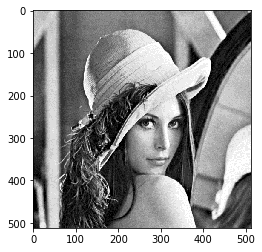

In [33]:
lena = Image.open('tutorial_img/lena.png').convert('L')
plt.imshow(lena)

Remember that this image is essentially just a $500 \times 500$ matrix of values.

In [34]:
np.asarray(lena).shape

(512, 512)

## Filters
We'll be learning about filters and how they work, with a particular focus on $3\times 3$ filters. Filters are commonly used to smoothing, sharpening, and edge detection. Take a look at this first filter - a verticle edge detector.
$$\begin{bmatrix}-1&0&1\\-2&0&2\\-1&0&1\end{bmatrix}$$

In [24]:
from scipy import ndimage

In [82]:
def convolution(image, _filter):
    """ Your Implementation Here """
#     return ndimage.convolve(image, _filter)
    m, n = image.shape
    fm, fn = _filter.shape
    
    conv_img = np.zeros((m,n))
    for i in range(m - fm):
        for j in range(n - fn):
            r, c = int(i + (fm - 1) / 2), int(j + (fn - 1) / 2)
            conv_img[r, c] = np.sum(image[i:i+fm,j:j+fn] * _filter)
    return conv_img

    
    
def test_convolution():
    # TODO
    pass

In [83]:
#TODO change image, doesn't work too well with horizontal/vertical edge detection

Text(0.5,1,'Smooth Filter')

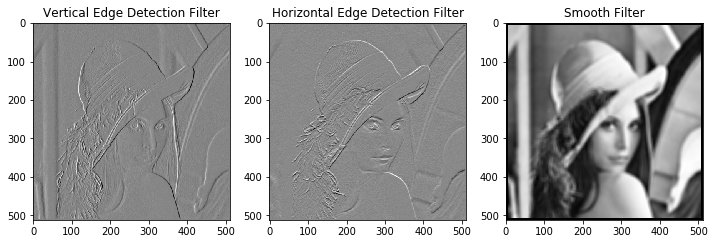

In [84]:
vertical = np.array([[-1,0,1], [-2,0,2],[-1,0,1]]) # Vertical edge detection
horizontal = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]) # Horizontal edge detection
smooth = np.ones((11,11))/100
lena_img = np.array(lena)
vertical_img = convolution(lena_img, vertical)
horizontal_img = convolution(lena_img, horizontal)
smooth_img = convolution(lena_img, smooth)
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,8))
ax1.imshow(vertical_img, cmap='gray')
ax1.set_title('Vertical Edge Detection Filter')
ax2.imshow(horizontal_img, cmap='gray')
ax2.set_title('Horizontal Edge Detection Filter')
ax3.imshow(smooth_img, cmap='gray')
ax3.set_title('Smooth Filter')

## Max-Pooling